<a href="https://colab.research.google.com/github/nei0017/Natasha_INFO4670.401_Spring2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [2]:
# Write your code here

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('Assignment 2 dataset.csv')
df.head()


Saving Assignment_2-1.ipynb to Assignment_2-1.ipynb


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv
   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Alban

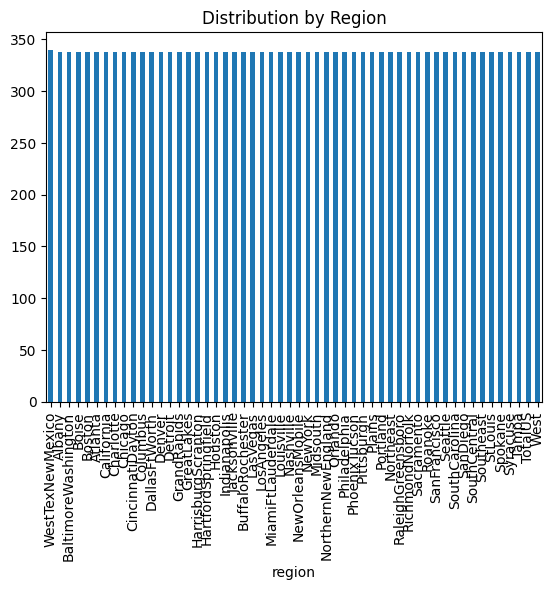

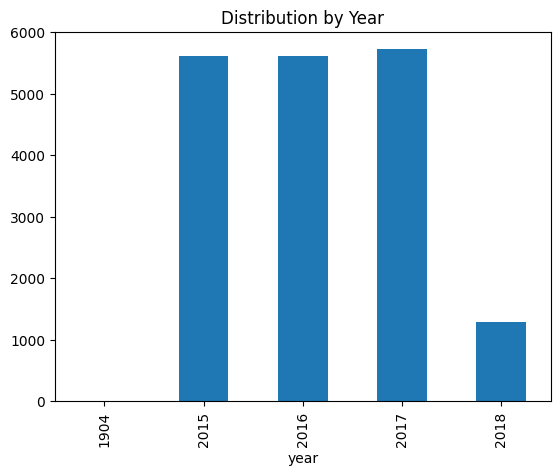

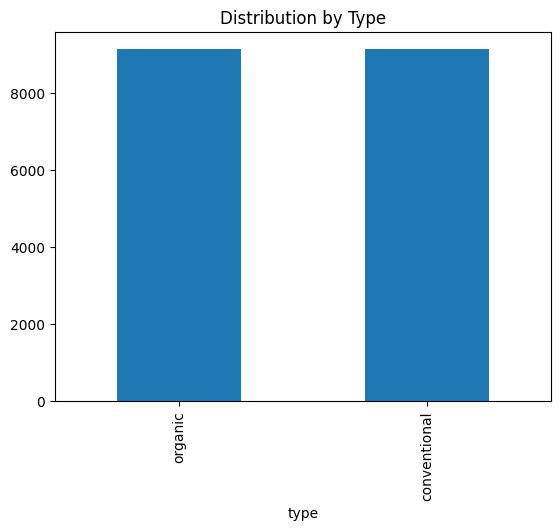

In [5]:
# Write your code here
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Assignment 2 dataset.csv')
print(df.head())
print(df.info())
print(df['region'].value_counts())

if 'year' in df.columns:
    print(df['year'].value_counts())
if 'type' in df.columns:
    print(df['type'].value_counts())

# Visualizing distributions
df['region'].value_counts().plot(kind='bar', title='Distribution by Region')
plt.show()

if 'year' in df.columns:
    df['year'].value_counts().sort_index().plot(kind='bar', title='Distribution by Year')
    plt.show()

if 'type' in df.columns:
    df['type'].value_counts().plot(kind='bar', title='Distribution by Type')
    plt.show()


1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [6]:
# Write your code here


number_dupli = df.duplicated().sum()
print(f"Number of duplicate rows: {number_dupli}")
missing = df.isnull().sum()
print("\nMissing values per column:")
print(missing)
# 1. Handling Duplicates
# Duplicate rows should be removed using df.drop_duplicates() to prevent
# bias and ensure that the same observations don't artificially inflate our results.

# 2. Handling Missing Values
#  If a column has very few missing values, I would use df.dropna() to remove those rows to keep the data clean.
# If a column is important but missing many values, I would use 'imputation'(filling them in with the mean, median, or mode) to preserve the dataset's size.



Number of duplicate rows: 2

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [7]:
# Write your code here
import pandas as pd


df = pd.read_csv('Assignment 2 dataset.csv')

rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")
# I think the data is sufficient for training a learning model, there is enough rows to find patterns in between
#So it is not too small for deep learning but it isn't too massive either.


Number of rows: 18254
Number of columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [9]:
# Write your code here
import pandas as pd
df= pd.read_csv('Assignment 2 dataset.csv')

#The goal is to remove the first column and treat year
df = df.drop(columns=['Column 1'])
df['year'] = df['year'].astype(str)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18254 non-null  object 
 1   AveragePrice  18254 non-null  float64
 2   Total Volume  18253 non-null  float64
 3   4046          18252 non-null  float64
 4   4225          18253 non-null  float64
 5   4770          18253 non-null  float64
 6   Total Bags    18253 non-null  float64
 7   Small Bags    18252 non-null  float64
 8   Large Bags    18252 non-null  float64
 9   XLarge Bags   18253 non-null  float64
 10  type          18253 non-null  object 
 11  year          18254 non-null  object 
 12  region        18254 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB
None
         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98  

2.2 Check for duplicate values and remove them.

In [11]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')

df = df.drop(columns=['Column 1'])
duplicate_count = df.duplicated().sum()
print(f"Duplicate count: {duplicate_count}")

#remove
df = df.drop_duplicates()
print(f"Number of rows: {len(df)}")

Duplicate count: 2
Number of rows: 18252


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [12]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')

if 'Column 1' in df.columns:
    df = df.drop(columns=['Column 1'])
df = df.drop_duplicates()
df['year'] = df['year'].astype(str)

missing = df.isnull().sum(axis=1)
threshold = 7
df_cleaned = df[missing < threshold].copy()


num_columns = df_cleaned.select_dtypes(include=['number']).columns

for col in num_columns:
    df[col] = df[col].fillna(df.groupby('region')[col].transform('median'))

print("\nMissing values after processing:")
print(df_cleaned.isnull().sum())


Missing values after processing:
Date            0
AveragePrice    0
Total Volume    0
4046            1
4225            0
4770            0
Total Bags      0
Small Bags      1
Large Bags      1
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


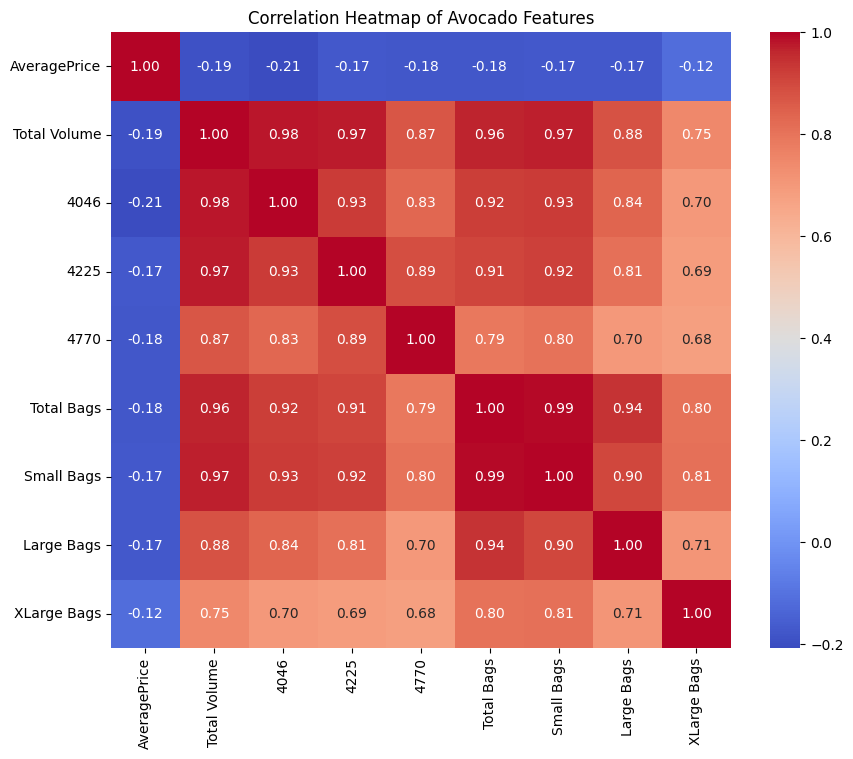

AveragePrice    1.000000
XLarge Bags    -0.117608
4225           -0.172948
Large Bags     -0.172958
Small Bags     -0.174745
Total Bags     -0.177106
4770           -0.179462
Total Volume   -0.192770
4046           -0.208327
Name: AveragePrice, dtype: float64


In [13]:
# Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Avocado Features')
plt.show()

print(correlation_matrix['AveragePrice'].sort_values(ascending=False))

#There are some patterns such as the Total volume, 4046, 4225, and Total bags have correlations higher than 0.95
# Its almost overlapping because up to 3 variables have almost perfect correlation

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [14]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')
numeric_df = df.select_dtypes(include=['number'])

stats = numeric_df.describe().transpose()[['min', 'max', 'mean']]

stats['median'] = numeric_df.median()
stats['range'] = stats['max'] - stats['min']

print(stats[['range', 'min', 'max', 'mean', 'median']])

                    range      min          max           mean      median
Column 1            52.00     0.00        52.00      24.228060      24.000
AveragePrice         2.81     0.44         3.25       1.406073       1.370
Total Volume  62505561.96    84.56  62505646.52  850460.939476  107306.080
4046          22743616.17     0.00  22743616.17  292960.525190    8640.940
4225          20470572.61     0.00  20470572.61  295090.457046   29054.710
4770           2546439.11     0.00   2546439.11   22834.810556     184.990
Total Bags    19373134.37     0.00  19373134.37  239589.049775   39737.030
Small Bags    13384586.80     0.00  13384586.80  182166.566714   26340.005
Large Bags     5719096.61     0.00   5719096.61   54329.185553    2646.115
XLarge Bags     551693.65     0.00    551693.65    3105.745759       0.000
year               114.00  1904.00      2018.00    2016.142161    2016.000


- Variables
* The date is for when the observation too place
* The type is for the category of an avocado
*The year is part of the date for the year it was observed.
*The region is for the area of the observation
* There are also measurements variables such as 4046, 4225, 4770, Small Bags, Large Bags, and XLarge Bags, and the price.

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [15]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
earliest = df['Date'].min()
print(f"Earliest recorded date: {earliest.strftime('%Y-%m-%d')}")

early_records = df[df['Date'].dt.year <= 2010]
print(early_records)

#No, the 1904 data point is not reasonable. It looks similar to the 2018 data which means its possibly a typo.
#I belive it would be reasonable to remove it because, it would create a gap in the timeline

Earliest recorded date: 1904-01-21
       Column 1       Date  AveragePrice  Total Volume     4046     4225  \
18250         9 1904-01-21          1.87      13766.76  1191.92  2452.79   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18250  727.94     9394.11      9351.8       42.31          0.0  organic  1904   

                 region  
18250  WestTexNewMexico  


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [17]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')

highest_price_index = df['AveragePrice'].idxmax()

highest_price = df.loc[highest_price_index, 'AveragePrice']
target_region = df.loc[highest_price_index, 'region']

print(f"Highest average price: ${highest_price}")
print(f"Region: {target_region}")

#I used idmax() to scan the column AveragePrice, then I pulled
#the value from the region column at where the price occured.

Highest average price: $3.25
Region: SanFrancisco


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [19]:
# Write your code here
import pandas as pd
df = pd.read_csv('Assignment 2 dataset.csv')

highest_volume_index = df['Total Volume'].idxmax()
highest_volume = df.loc[highest_volume_index, 'Total Volume']
target_region = df.loc[highest_volume_index, 'region']

print(f"Highest total volume is: {highest_volume:,.2f}")
print(f"Region: {target_region}")

#I used idmax() to search through the total volume column which confirmed that TotalUS was the highest sales volume"

Highest total volume is: 62,505,646.52
Region: TotalUS
